# Analyzing factors affecting the cost of cars and predicting prices using machine learning models
This analysis examines the major factors affecting vehicle prices, including brand, model, year of manufacture, engine size, fuel type, transmission, and mileage. Visualizations are presented to show the distribution of prices and the dependence on various characteristics. Machine learning models (linear regression, decision tree and random forest) are also used to predict prices, with an evaluation of their performance and identification of the most significant features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

file_path = '/kaggle/input/car-price-prediction/car_price_prediction_.csv'
data = pd.read_csv(file_path)
data.head(20)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
5,6,Audi,2019,2.4,Diesel,Automatic,246553,Like New,88969.76,Q7
6,7,Audi,2020,4.0,Electric,Automatic,135486,Used,63498.75,Q5
7,8,Tesla,2017,5.3,Hybrid,Automatic,83030,New,17381.19,Model Y
8,9,Honda,2023,5.7,Electric,Manual,120360,Like New,15905.62,Civic
9,10,Ford,2010,1.5,Electric,Automatic,135009,Like New,9560.22,Explorer


In [2]:
brand_price = data.groupby('Brand')['Price'].mean().sort_values(ascending=False)
print("Average price of cars by brand:\n", brand_price)

Average price of cars by brand:
 Brand
BMW         54157.114385
Tesla       53475.547471
Mercedes    53191.090085
Toyota      52078.728235
Honda       52050.283949
Audi        51953.424810
Ford        51593.254813
Name: Price, dtype: float64


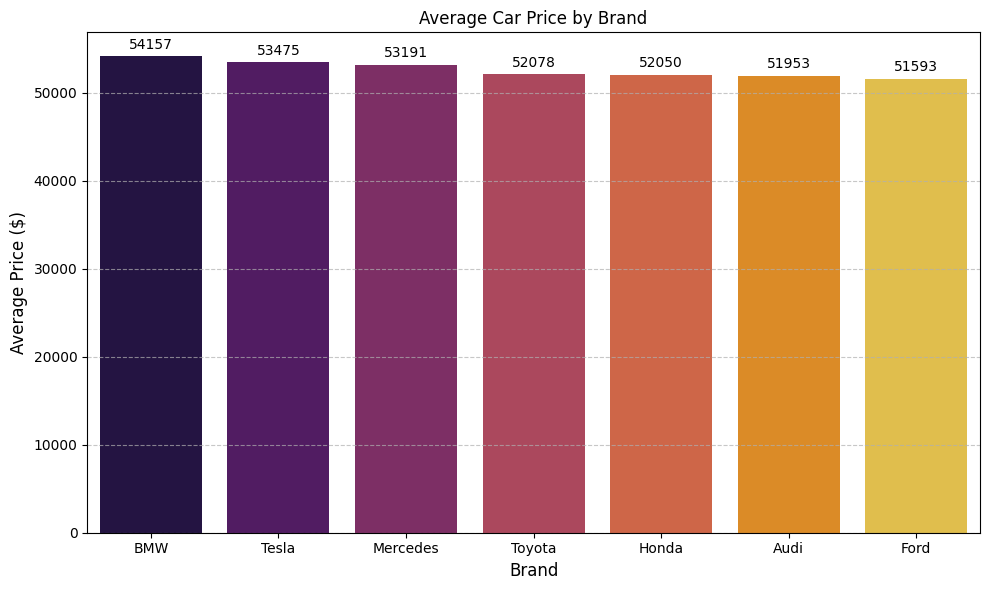

In [3]:
plt.figure(figsize=(10, 6)) 

sns.barplot(x=brand_price.index, y=brand_price.values, palette='inferno')

for index, value in enumerate(brand_price.values):
    plt.text(index, value + 500, f'{int(value)}', ha='center', va='bottom')

plt.title('Average Car Price by Brand', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

plt.xticks(rotation=0, ha='center')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.tight_layout()  
plt.show()

**This chart is a bar chart showing the average price of cars by brand. The X-axis shows the brand names and the Y-axis shows their respective average prices.**


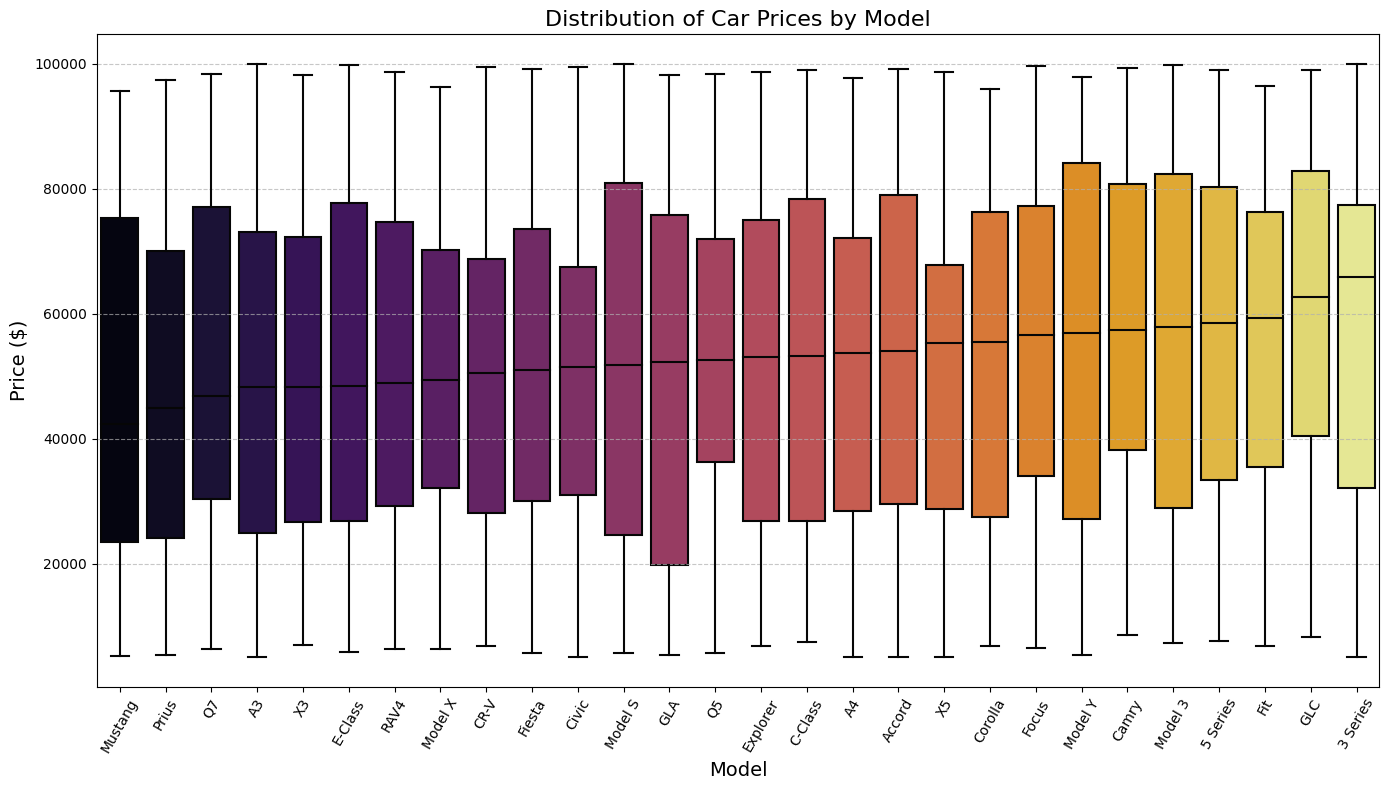

In [4]:
plt.figure(figsize=(14, 8))

median_prices = data.groupby('Model')['Price'].median()
sorted_models = median_prices.sort_values().index

sns.boxplot(x='Model', y='Price', data=data, palette='inferno', order=sorted_models)

plt.title('Distribution of Car Prices by Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

plt.xticks(rotation=60, ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

**Cars from premium brands such as Tesla, BMW and Mercedes have a higher average price, supporting the hypothesis that luxury brands are indeed significantly more expensive.**

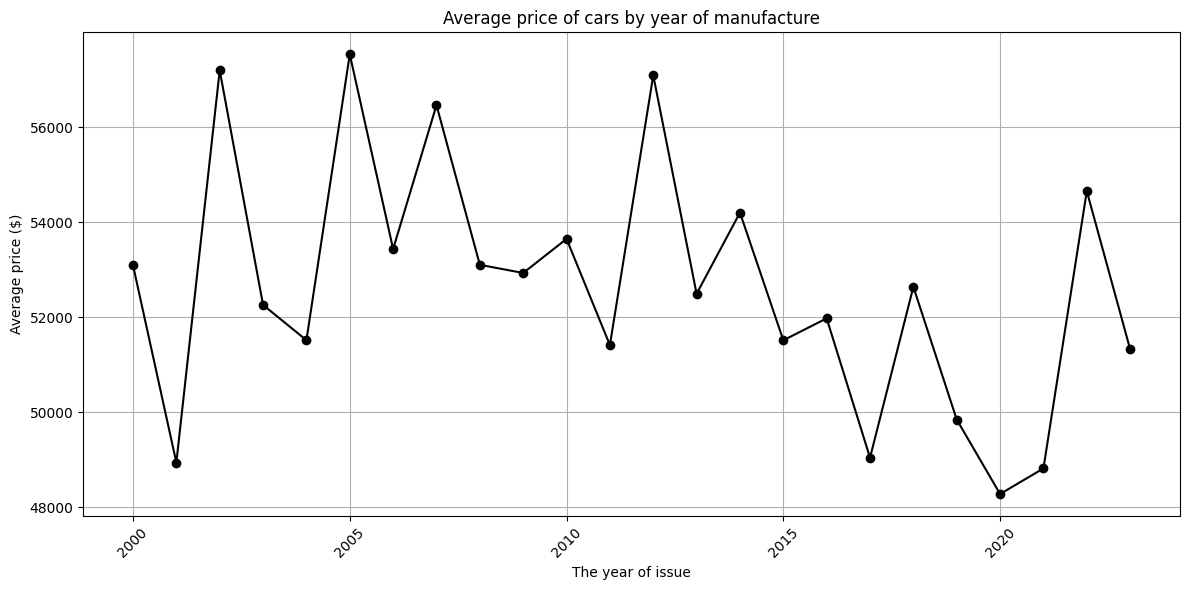

In [5]:
year_price = data.groupby('Year')['Price'].mean().reset_index()
year_price = year_price.sort_values('Year')
plt.figure(figsize=(12, 6))
plt.plot(year_price['Year'], year_price['Price'], marker='o', linestyle='-', color='black')
plt.title('Average price of cars by year of manufacture', fontsize=12)
plt.xlabel('The year of issue', fontsize=10)
plt.ylabel('Average price ($)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

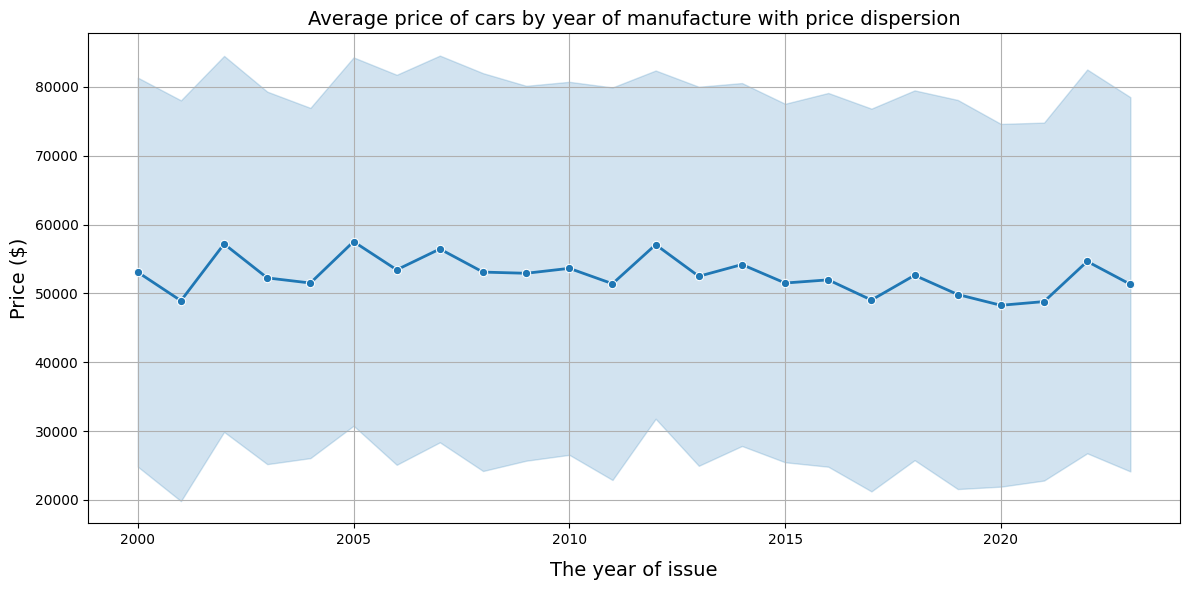

In [6]:
data_sorted = data.sort_values('Year')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Price', data=data_sorted, ci='sd', marker='o', linewidth=2)
plt.title('Average price of cars by year of manufacture with price dispersion', fontsize=14)
plt.xlabel('The year of issue', fontsize=14, ha='center', labelpad=10)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
fig = px.scatter(data, x="Year", y="Price", color="Brand", title="Price Depreciation by Year and Brand")
fig.show()

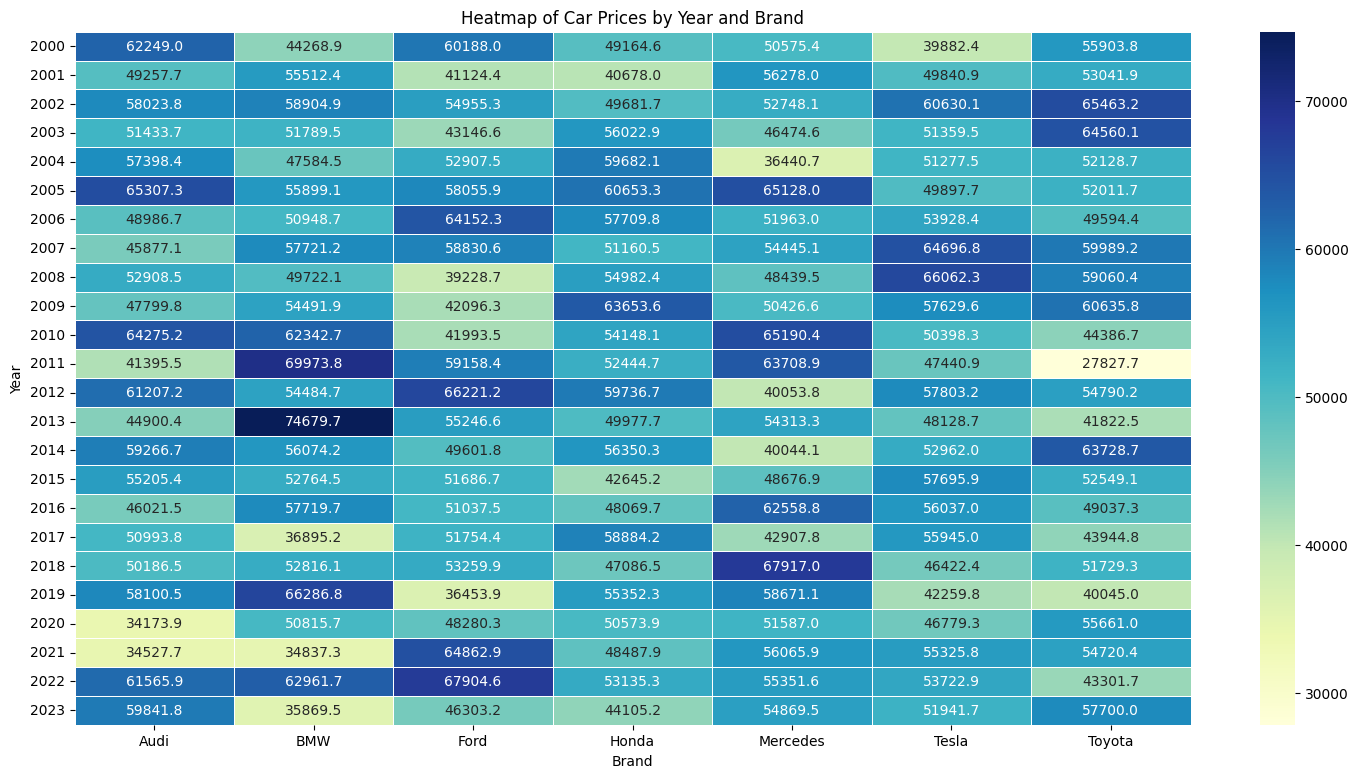

In [8]:
heatmap_data = pd.pivot_table(data, values='Price', index='Year', columns='Brand', aggfunc='mean')
plt.figure(figsize=(18,9))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)
plt.title('Heatmap of Car Prices by Year and Brand')
plt.show()

1. 	Car prices vary by brand and year. For example, Mercedes and Tesla cars have high average prices in recent years (especially 2021-2023), which can be explained by their premium positioning and new technological solutions.
2. 	Older cars (e.g. 2000-2005) show a significant decrease in value across all brands. This is due to natural depreciation and technology obsolescence.
3. 	Sharp price changes can be seen in certain years for some brands. For example, BMW has a sharp price increase in 2011, while Honda shows a decline in the same year.
4. 	Tesla and Mercedes maintain higher prices compared to brands such as Ford and Honda throughout the period, emphasising their premium nature.
5. 	Ford and Honda show more stable and lower prices, indicating their positioning in the mid-range and budget segment.

**These trends demonstrate how year of manufacture and brand affect pricing in the car market.**

In [9]:
fig = px.scatter(
    data_frame=data,
    x='Engine Size',
    y='Price',
    color='Fuel Type',
    size='Mileage',
    hover_data=['Brand', 'Model', 'Year', 'Transmission', 'Condition'],
    title='Price dependence on engine size with respect to fuel type',
    labels={
        'Engine Size': 'Engine size (L)',
        'Price': 'Price ($)',
        'Fuel Type': 'Fuel type',
        'Mileage': 'Mileage (M)'
    },
    template='ggplot2',
    width=1500,
    height=800
)

fig.update_layout(
    xaxis_title='Engine size (L)',
    yaxis_title='Price ($)',
    legend_title='Fuel type'
)
fig.show()

**The graph “Price dependence on engine size with respect to fuel type” clearly demonstrates the positive correlation between engine size and car price: as engine size increases, car price tends to increase. The color differentiation of points by fuel type shows that certain fuel types predominate in certain ranges of engine size and price. For example, cars with large engines and high prices are more likely to use a certain fuel type. This graph confirms that engine size and fuel type are significant factors affecting vehicle price, and considering them together is important for understanding pricing in the automobile market.**

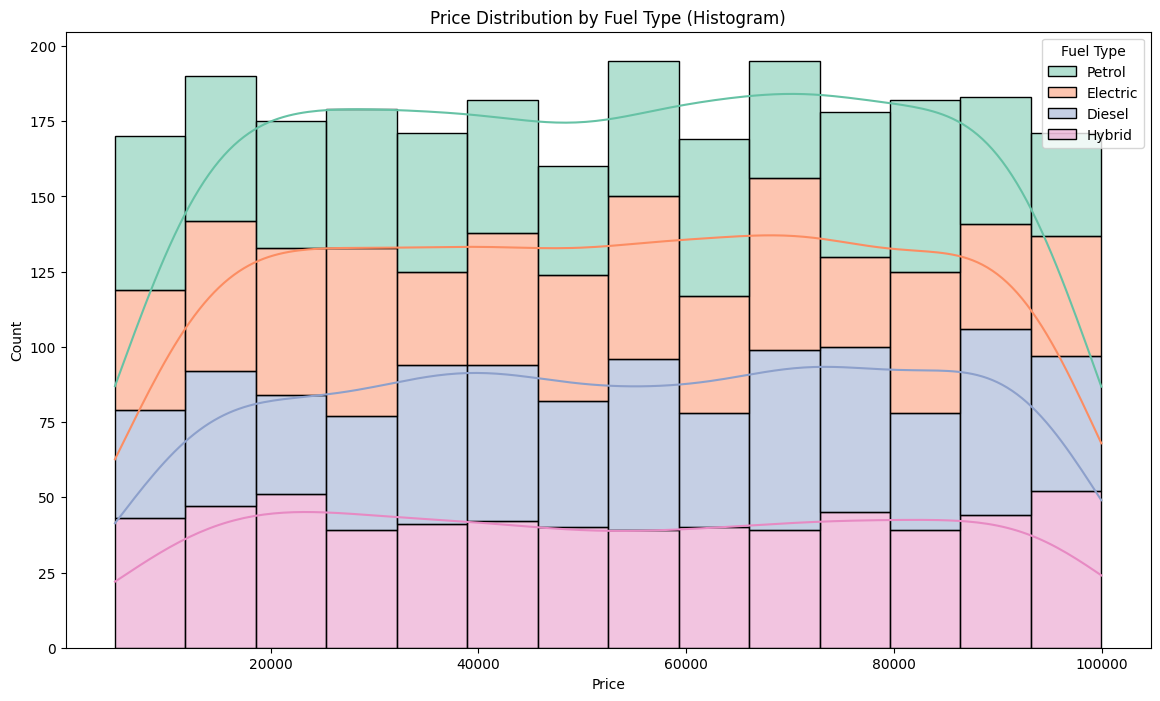

In [10]:
plt.figure(figsize=(14, 8))
sns.histplot(data=data, x='Price', hue='Fuel Type', multiple='stack', palette='Set2', kde=True)
plt.title('Price Distribution by Fuel Type (Histogram)')
plt.show()

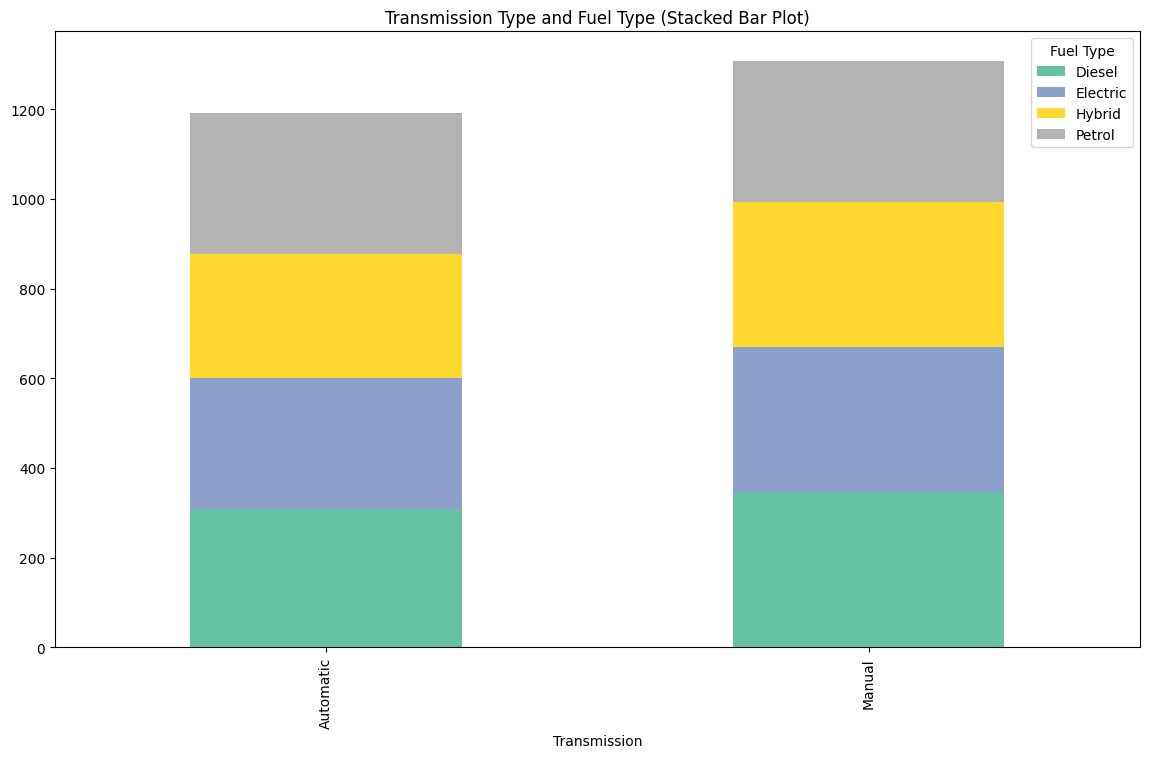

In [11]:
transmission_price = data.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
transmission_fuel = pd.crosstab(data['Transmission'], data['Fuel Type'])
transmission_fuel.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Transmission Type and Fuel Type (Stacked Bar Plot)')
plt.show()

**After conducting a comprehensive analysis of the data and identifying the main factors affecting the price of cars, we move on to the next step - building machine learning models to predict prices.**

Using *linear regression, decision tree and random forest*, we:

* **Evaluate the performance of different algorithms** in predicting the price of a car based on its characteristics.
* **We will compare the models** in terms of quality metrics such as root mean square error (RMSE).
* **Identify the most significant features** affecting the price by analyzing the importance of features in the random forest model.

In [12]:
data_ml = data.drop(columns=['Car ID'])
encoder = OneHotEncoder(sparse=False)
categorical_columns = ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
encoded_categorical_data = encoder.fit_transform(data_ml[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))
data_ml = pd.concat([data_ml.drop(columns=categorical_columns), encoded_df], axis=1)
X = data_ml.drop(columns=['Price'])
y = data_ml['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f'RMSE Linear_Regression: {rmse_lr}')

RMSE Linear_Regression: 27828.568981012126


In [13]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print(f'RMSE Decision_Tree_Regressor: {rmse_dt}')

RMSE Decision_Tree_Regressor: 36804.92864567178


In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f'RMSE Random_Forest_Regressor: {rmse_rf}')

RMSE Random_Forest_Regressor: 28305.592307951345


**Summary:**

In the process of building machine learning models for predicting car prices, three models were trained: **linear regression, decision tree, and random forest**. The RMSE (root mean square error) values for each model were obtained:

* **Linear regression**: RMSE = **27,828.57**
* **Decision tree**: RMSE = **36,804.93**
* **Random forest**: RMSE = **28,305.59**

**Conclusions:**

* **Linear regression** showed the best result with the lowest RMSE value, indicating its better ability to predict car prices in this dataset.
* **Random forest** showed a result close to linear regression but with a slightly higher RMSE value.
* **The decision tree** showed the worst result with the highest RMSE, which may be due to overtraining or insufficient generalization ability of the model.

Conclusion:

Linear regression proved to be the most effective model for predicting car prices in this case study. This may indicate that the relationship between attributes and price is predominantly linear in nature

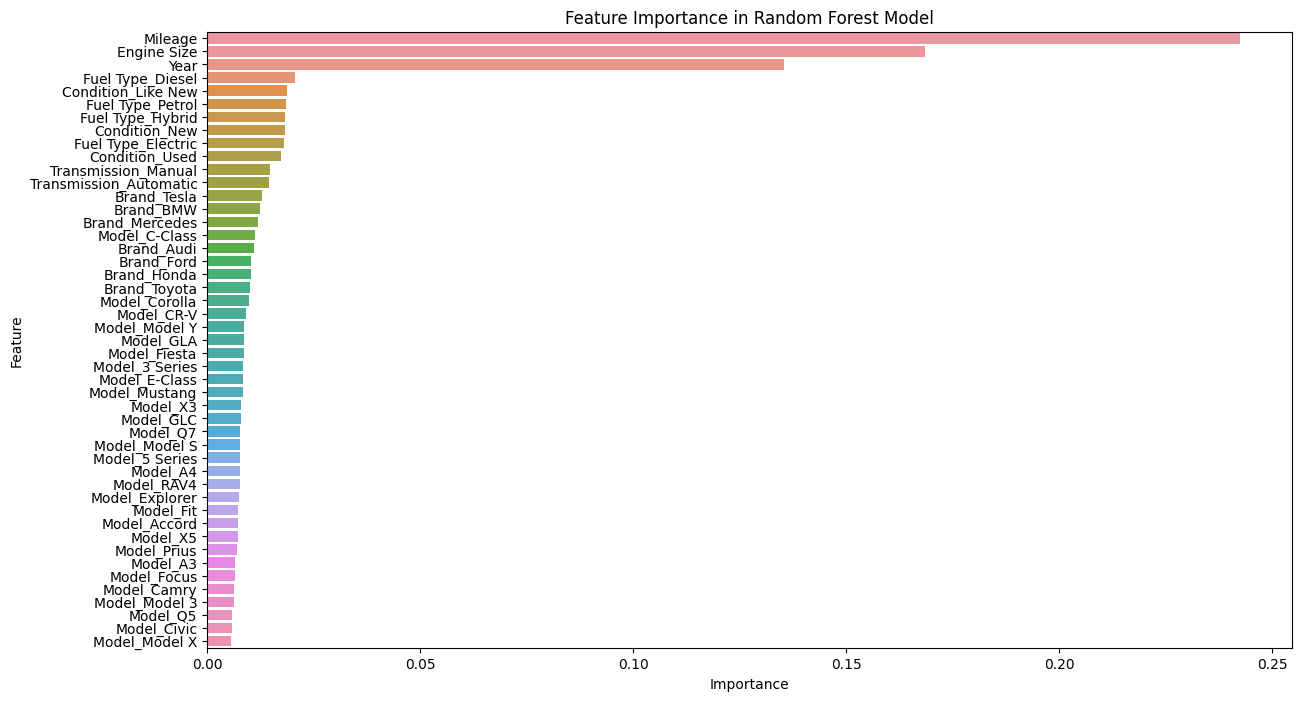

In [15]:
importances = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

The graph confirms that **year of manufacture, mileage, engine displacement** are key factors in predicting the price of a car. These attributes have the greatest influence on the random forest model and are therefore the most important to consider when estimating car prices. Understanding the importance of these attributes can help further improve the model and provide more accurate predictions, and provides valuable insight for automotive marketers.

In [16]:
correlation = data['Mileage'].corr(data['Price'])
print(f'Correlation between mileage and price: \n{correlation}\n')

X = data['Mileage'].values.reshape(-1, 1)
y = data['Price'].values
fig = px.scatter(data, x='Mileage', y='Price', color='Brand', 
                 title="Mileage vs. Price", 
                 labels={"Mileage": "Mileage (M)", "Price": "Price ($)"},
                 hover_data=['Model'])

fig.update_layout(template='plotly_dark', width=800, height=500)
fig.show()

Correlation between mileage and price: 
-0.008567419950321703



* Weak negative correlation: The correlation coefficient between Mileage and Price is approximately -0.0086, indicating a very weak negative relationship. This means that Mileage has almost no significant effect on the price of the car in this sample.

**Mileage is not a major factor affecting the price of a car, at least in this data sample. This may suggest that other characteristics (e.g. year of manufacture, condition, brand) play a more important role in determining price.**

In [17]:
data['Mileage_Group'] = pd.cut(data['Mileage'], bins=[0, 50000, 100000, 150000, 200000, np.inf], 
                               labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+'])

group_price = data.groupby('Mileage_Group')['Price'].mean().reset_index()
group_price['Price'] = group_price['Price'].round()

fig = px.bar(group_price, x='Mileage_Group', y='Price', title="Average Car Price by Mileage Group",
             labels={"Mileage_Group": "Mileage Group", "Price": "Average Price ($)"}, text='Price')

fig.update_layout(template='plotly_dark', width=800, height=500)
fig.show()

**The “Average Car Price by Mileage Group” graph shows the average price of cars in different mileage groups. Mileage was divided into 5 ranges: 0-50k, 50k-100k, 100k-150k, 150k-200k, and 200k+ kilometers.**

**Analysis and conclusions:**

* **Unpredictable trend**: The expected trend of price decreasing with increasing mileage is not observed. On the contrary, the 150k-200k mileage group has the highest average price, which is unexpected.
* **Average Prices**: The average price of cars remains relatively stable across all groups, with little variation between ranges.

* **Potential Explanations**:
1. The high-mileage group (150k-200k) may include premium cars that retain a high price even with significant mileage.
2. There may be other important factors in the data that influence price such as brand, model, age and condition of the car.

**Conclusion:**
The graph shows that mileage alone is not a determining factor in predicting the average price of a car. Additional variables need to be considered for a more accurate analysis.

In [18]:
condition_price = data.groupby('Condition')['Price'].mean().reset_index()

fig = px.sunburst(data, path=['Condition', 'Brand'], values='Price', 
                  title="Impact of Car Condition on Price (Sunburst Plot)",
                  color='Price', hover_data=['Price'], 
                  color_continuous_scale='RdYlBu', maxdepth=2)

fig.update_layout(template='plotly_dark', width=800, height=600)
fig.show()

In [19]:
fig = px.treemap(data, path=['Condition', 'Brand', 'Model'], values='Price', 
                 title="Impact of Car Condition, Brand, and Model on Price (Treemap)",
                 color='Price', hover_data=['Price'], 
                 color_continuous_scale='RdYlBu')

fig.update_layout(template='plotly_dark', width=900, height=700)
fig.show()

# 🏁 **Crossing the Finish Line** 🏁

And there we have it—**the ultimate journey** through the intricate world of car pricing! 🚗💨

---

### 💡 **What Did We Learn?**
- **Condition matters**, but it's not the only driver—other factors like **brand** can shift the gears on pricing.
- **Mileage vs. Price?** While you'd expect a direct link, our data says, "Not so fast!" 🚦
- **Fuel type and engine size** show their power, but the real winners? **Those premium brands and models** that hold their value mile after mile.

---

### 🏆 **Why Vote?**
Because this isn’t just a notebook—it’s a full-throttle **data experience**! Your vote powers this analysis to the top of the leaderboard.
